# Data preprocessing

* Encodage   : Des données qualitatives en quantitative (homme=1, femme=0)
* Normaliser : ramène sur [0, 1 la gamme de toutes les valeurs quantitative
* Imputation : Remplace NaN par des valeurs (moyenne de la série par exemple)
* Sélection  : Utiliser le X² pour choisir les variables les plus utiles au développement d'un modèle
* Extraction : de caractéristiques. Générer de nouvelles variables à partir d'infos cachées dans le dataset 

Les modules de scikit learn :
* sklearn.preprocessing       : couvre Encodage, Normalisation,...
* sklearn.input               : couvre l'imputation
* sklearn.feature_selection   : couvre la sélection
* sklearn.feature_extraction  : couvre l'extraction

Ici on ne parle que du **module preprocessing**

Question : on parle pas de filtrage ?

## Transformer
Dans le module sklearn.preprocessing il y a 
* des classes (commencent avec une majuscule). Des Transformers
* des fonctions mathématique (sans majuscule)

Les objets Transformers permettent de traiter toutes les données de manières similaires (demain avec un nouveau jeu, Train set vs Test set...)
Les Transformers ont 2 méthodes
* fit()           : développe une fonction de transformation à partir de X_Train
* transform()     : applique la fonction de transformation sur les données présentées  
* fit_transform() : fait les 2 à la fois


In [162]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

X = np.array(["Chat",
              "Chien",
              "Chat",
              "Oiseau"])
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [163]:
transformer.transform(X)

array([0, 1, 0, 2])

In [164]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

X = np.array(["Chat",
              "Chien",
              "Chat",
              "Oiseau"])
transformer = LabelEncoder()
transformer.fit_transform(X) # Fait les 2 opérations en 1

array([0, 1, 0, 2], dtype=int64)

De manière pratique :
1. On divise le Dataset (X, y) et (XTrain, yTrain) et (XTest, yTest)
1. Avec les données du Train set et fit_transform() on développe une fonction de transformation
1. On présente les (XTrain, yTrain) qui sortent du Transformer à l'Estimator pour entrainer le modèle (fit())

![Alt text](assets/tranformer1.png)

1. Quand c'est fait
1. On fait passer (XTest, yTest) via le Transformer et l'Estimator (predict()) pour sortir des prédictions 

![Alt text](assets/tranformer2.png)

L'ensemble [Transformer] + [Estimator] constitue un Pipeline

## Les Transformers du module sklearn.preprocessing

![Alt text](assets/tranformer3.png)


## Les Transformers d'Encodage
* Faut convertir les données qualitatives en données quantitatives
* C'est ça l'encodage
* Il y a 5 Transformers d'Encodage
  1. preprocessing.LabelEncoder()
  1. preprocessing.OrdinalEncoder()
  1. preprocessing.OneHotEncoder()
  1. preprocessing.LabelBinarizer()
  1. preprocessing.MultiLabelBinarizer()
* Permettent 2 types d'encodage
  1. Encodage Ordinal : chaque catégorie est associée à une unique valeur - LabelEncoder (dédié à y, 1 colonne) & OrdinalEncoder (multi colonnes toutes quantitatives)
  1. Encodage One Hot  


### Encodage Ordinal

1. preprocessing.LabelEncoder() : pour y
1. preprocessing.OrdinalEncoder() : pour X

In [165]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

y = np.array(["Chat",
              "Chien",
              "Chat",
              "Oiseau"])
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

* Pour certains Transformer, dont le preprocessing.LabelEncoder(), il existe une méthode inverse_transform().
* Peut être utile pour la communication des résultats

Pour encoder un tableau a plusieurs variables quantitatives on utilise OrdinalEncoder

![Alt text](assets/tranformer4.png)

In [166]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

X = np.array([
              ["Chat", "Poils"],
              ["Chien", "Poils"],
              ["Chat", "Poils"],
              ["Oiseau", "Plumes"]
            ])
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

### Encodage One Hot

1. preprocessing.LabelBinarizer() : pour vect y - penser à LabelEncode (une colonne y) mais en mode One Hot
1. preprocessing.OneHotEncoder() : pour matrice X
1. preprocessing.MultiLabelBinarizer() : pour ???

* Attention car ici, après encodage, on avait Oiseau = 2 > Chien = 1 > Chat = 0
* À part dans les arbres de décision qui ne sont pas sensibles aux relations d'ordre entre les données, on ne peut pas utiliser une telle labélisation.
* L'encodage **One Hot** répond à ce problème : chaque catégorie/classe (chien, chat...) est représentée de façon binaire dans une colonne qui lui est propre. On a autant de colonnes que de classes. Chaque colonne ne comporte que des 0 et des 1
* Les algos de Machine Learning ne peuvent plus comparer les "valeurs" chien, chat...

![Alt text](assets/tranformer5.png)


In [167]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

y = np.array(["Chat",
              "Chien",
              "Chat",
              "Oiseau"])
transformer = LabelBinarizer()
transformer.fit_transform(y)  # Les colonnes sont dans l'ordre alpha des labels

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

* **Note** si on a beaucoup de labels (100 villes par exemple)
* On se retrouve avec un gros tableau 100x100 qui est optimisé (sparse matrix). 
* scikit learn utilise un format CSR  = compress sparse row.
* Il y a donc un paramètre sparse_output lors de l'invocation du constructeur LabelBinarizer()

In [168]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

y = np.array(["Chat",
              "Chien",
              "Chat",
              "Oiseau"])
transformer = LabelBinarizer(sparse_output=True)
transformer.fit_transform(y)  # Les colonnes sont dans l'ordre alpha des labels

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

Pour l'encoder OneHotEncoder() par défaut on a sparse_output=True

![Alt text](assets/tranformer6.png)

In [169]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

X = np.array([
              ["Chat", "Poils"],
              ["Chien", "Poils"],
              ["Chat", "Poils"],
              ["Oiseau", "Plumes"]
            ])
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

TO DO : MultiLabelBinarizer

### À retenir
![Alt text](assets/tranformer7.png)



## Les Transformers de Normalisation
* Faut normaliser les données quantitatives
* Les mettre sur une même échelle
* Facilite l'apprentissage des modèles qui utilisent descente de gradient, calculs de distance, calcul de variance
* Faut pas qu'une variable "pèse" plus que les autres

Les 3 classes les plus connues
1. preprocessing.MinMaxScaler()
1. preprocessing.StandardScaler() 
1. preprocessing.RobustScaler() 


### Normalisation MinMaxScaler()
$$X_{scaled} = \frac{X-X_{min}}{X_{max}-X_{min}}$$ 

In [170]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X = np.array([            # Une MATRICE 3 lignes et 1 colonne
  [70],
  [80],
  [120]
])
print (type(X), X.ndim, X.shape)

scaler = MinMaxScaler()
scaler.fit_transform(X)


<class 'numpy.ndarray'> 2 (3, 1)


array([[0. ],
       [0.2],
       [1. ]])

In [171]:
import numpy as np

X = np.array([            # Une MATRICE 3 lignes et 1 colonne
  [70],
  [80],
  [120]
])
print (type(X), X.ndim, X.shape)

Z = np.array([70, 80, 120 ])   # # Un VECTEUR à 3 éléments
print (type(Z), Z.ndim, Z.shape)

<class 'numpy.ndarray'> 2 (3, 1)
<class 'numpy.ndarray'> 1 (3,)


* Il faut bine voir qu'on ne perd pas d'information car on a gardé les proportions entre les valeurs. 
* Si on a de nouvelles valeurs faut commencer par les normaliser

In [172]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

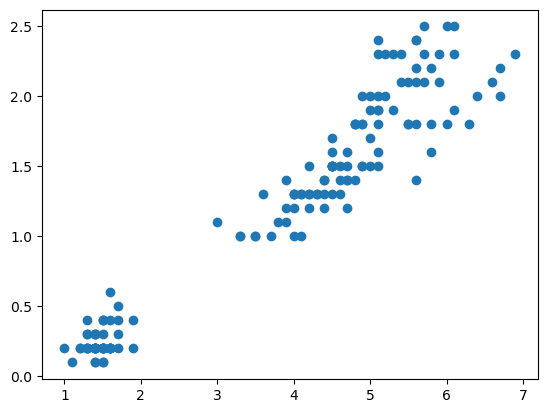

In [187]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

_ = plt.scatter(X[:,2], X[:, 3])
#plt.show

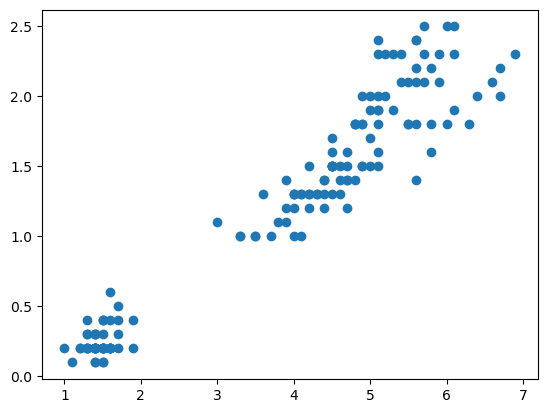

In [174]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
_ = ax.scatter(X[:,2], X[:, 3])

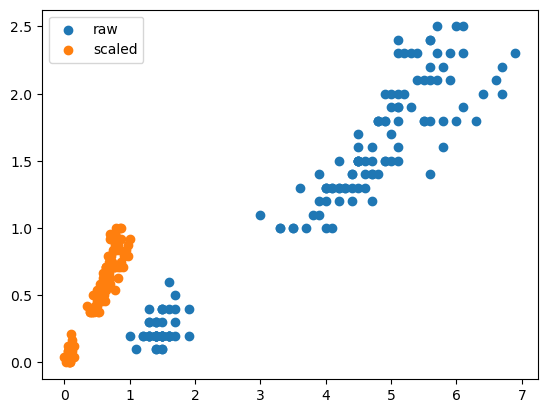

In [188]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
ax.scatter(X[:,2], X[:, 3], label="raw")

X_minmax = MinMaxScaler().fit_transform(X)
ax.scatter(X_minmax[:,2], X_minmax[:, 3], label="scaled") # les données normalisées sont bien entre 0 et 1

_ = ax.legend()

### Normalisation preprocessing.StandardScaler()
* Chaque variable aura une moyenne égale à 0 et un écart type de 1
* $X_{scaled} = \frac{X-\mu_{min}}{\sigma_X}$
* Idéal pour modèles de type Support Vector Machine (SVR) ou Principal Component Analysis (??????)
* On peut revenir aux données initiales avec inverse_transform()

In [176]:
from sklearn.preprocessing import StandardScaler
X = np.array([
  [70],
  [80],
  [120]
])
print (type(X), X.ndim, X.shape)

scaler = StandardScaler()
X_Transf = scaler.fit_transform(X)
print(X_Transf)
print (X_Transf[:, 0].sum()) # la somme est null

<class 'numpy.ndarray'> 2 (3, 1)
[[-0.9258201 ]
 [-0.46291005]
 [ 1.38873015]]
-2.220446049250313e-16


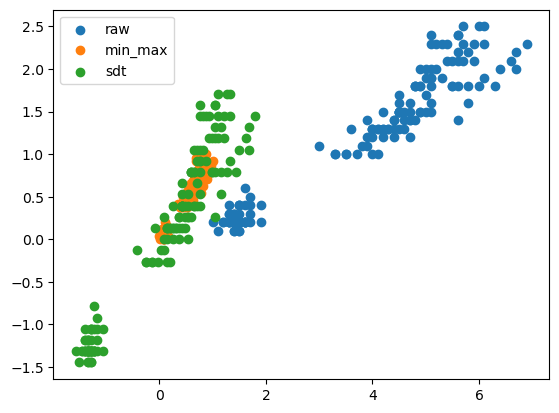

In [177]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
_ = ax.scatter(X[:,2], X[:, 3], label="raw")

X_minmax = MinMaxScaler().fit_transform(X)
ax.scatter(X_minmax[:,2], X_minmax[:, 3], label="min_max") # les données normalisées sont bien entre 0 et 1

X_sdt = StandardScaler().fit_transform(X)
ax.scatter(X_sdt[:,2], X_sdt[:, 3], label="sdt") 


ax.legend()

* preprocessing.MinMaxScaler() et preprocessing.StandardScaler() sont cependant sensibles aux valeurs aberrantes
* outliers

Ci-dessous 
* on ajoute 10 outliers
* dans le cas de MinMax toutes les valeurs "normales" se retrouvent compressées entre 0 et 0.06 (faut zoomer pour le voir)
* idem pour les données issue de StandardScaler. Elles sont compressés pour réussir à sortir une moyenne à 0 et un écart type de 1

[[-1.84306955 -0.477974   -0.47965581  0.6203583 ]
 [ 0.69845715  0.00377089  0.93184837  0.33996498]
 [-0.01568211  0.16092817 -0.19065349 -0.39484951]
 [-0.26773354 -1.12801133  0.28044171 -0.99312361]
 [ 0.84163126 -0.24945858  0.04949498  0.49383678]
 [ 0.64331447 -1.57062341 -0.20690368  0.88017891]
 [-1.69810582  0.38728048 -2.25556423 -1.02250684]
 [ 0.03863055 -1.6567151  -0.98551074 -1.47183501]
 [ 1.64813493  0.16422776  0.56729028 -0.2226751 ]
 [-0.35343175 -1.61647419 -0.29183736 -0.76149221]]


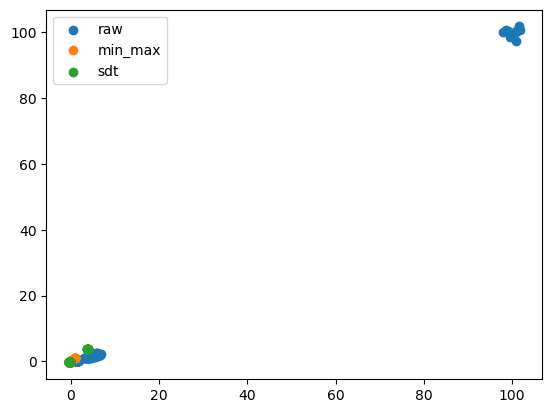

In [191]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data

# Matrice 10 lignes et 4 colonne de nb aléatoire entre -1 et 1 
# tmp = np.random.randn(10, 4)
# print(tmp)

# Matrice 10 lignes et 4 colonne de 100
# tmp = np.full((10, 4), 100)
# print(tmp)

outliers = np.full((10, 4), 100) + np.random.randn(10, 4) 
X = np.vstack((X, outliers))

fig, ax = plt.subplots()
_ = ax.scatter(X[:,2], X[:, 3], label="raw")

X_minmax = MinMaxScaler().fit_transform(X)
ax.scatter(X_minmax[:,2], X_minmax[:, 3], label="min_max") # les données normalisées sont bien entre 0 et 1

X_sdt = StandardScaler().fit_transform(X)
ax.scatter(X_sdt[:,2], X_sdt[:, 3], label="sdt") 


ax.legend()

### Conclusion partielle
Il faut éviter d'utiliser preprocessing.MinMaxScaler() et preprocessing.StandardScaler() si il y a des outliers dans le Dataset

### preprocessing.RobustScaler()
* $X_{scaled} = \frac{X - Median}{IQR}  $
* où IQR (l'inter quartile) est la distance Q1-Q3

![Alt text](assets/robust_scaler.png)

* La médiane est beaucoup moins sensible aux outliers

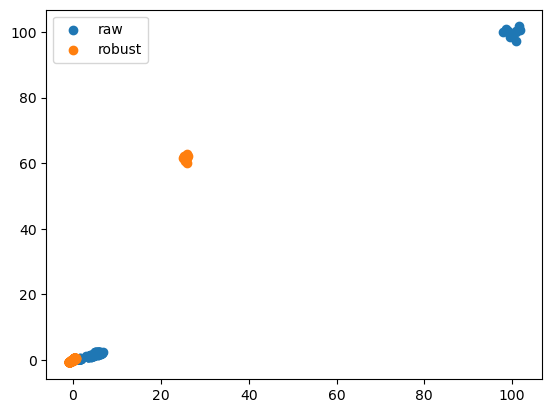

In [179]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

iris = load_iris()
X = iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

fig, ax = plt.subplots()
_ = ax.scatter(X[:,2], X[:, 3], label="raw")

# X_minmax = MinMaxScaler().fit_transform(X)
# ax.scatter(X_minmax[:,2], X_minmax[:, 3], label="min_max") # les données normalisées sont bien entre 0 et 1

# X_sdt = StandardScaler().fit_transform(X)
# ax.scatter(X_sdt[:,2], X_sdt[:, 3], label="sdt") 

X_rob = RobustScaler().fit_transform(X)
ax.scatter(X_rob[:,2], X_rob[:, 3], label="robust") 

_ = ax.legend()

### Note
* Il existe d'autres Transformers de normalisation
* Attention preprocessing.Normalizer() qui normalise les lignes et PAS les colonnes (peut être utile an Natural Language Processing)

## Les autres Transformers du module preprocessing
1. Création de polynomes
1. Transformations non linéaires
1. Discrétisation
1. Personnalisation

### preprocessing.PolynomialFeatures()
* Créer des variables polynomiales à partir des variables

![Alt text](assets/polynomial_features.png)

* La machine apprend un modèle du type $f(x) = ax^2 + bx + c$

In [180]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([
  [1],
  [2],
  [.5]
])
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

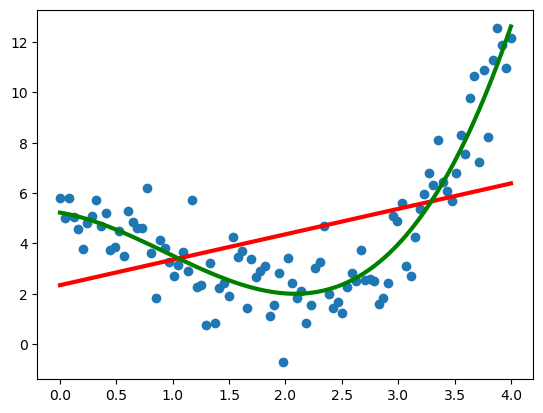

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 4, 100). reshape(100, 1)
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

fig, ax = plt.subplots()
ax.scatter(X, y)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
ax.plot(X, y_pred, c='red', lw=3)

X_poly = PolynomialFeatures(3).fit_transform(X)
model2 = LinearRegression().fit(X_poly, y)
y_pred2 = model2.predict(X_poly)
_ = ax.plot(X, y_pred2, c='green', lw=3)


* Si on a plusieurs variables le transformer PolynomialFeatures() créé toutes les combinaisons de variables possibles

![Alt text](assets/polynomial_features2.png)

* Exemple : combiner la surf d'un appartement avec le nb de pieces pour créer une nouvelle variable
* ATTNETION : il faudra **normaliser** les données issues du PolynomialFeatures

### Transformations non linéaires
* preprocessing.PowerTransformer()
* preprocessing.QuantileTransformer()

* Ils vont engendrer une distribution plus normale ou gaussienne
* Aide certains modèles 
* TO DO : revenir sur le sujet

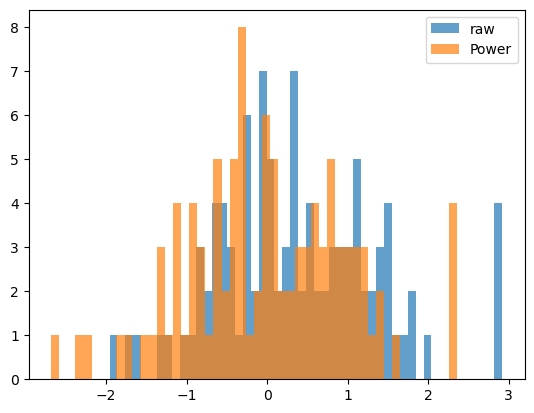

In [182]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots()

np.random.seed(0)
X = np.random.rand(100, 2) + np.random.randn(100, 2)
ax.hist(X[:, 0], bins=50, alpha=0.7, label="raw")

X2 = PowerTransformer().fit_transform(X)
ax.hist(X2[:, 0], bins=50, alpha=0.7, label="Power")

_ = ax.legend()

### Transformers de discretisation
1. preprocessing.Binarizer()
1. preprocessing.KBinsDiscretizer()

* Découper une variable continue en plrs parties
* Permet de créer facilement des catégories dans une variable (age, salaire...)

### preprocessing.Binarizer()
* Fonction de seuil
* ![Alt text](assets/binarizer.png)

In [183]:
import numpy as np
from sklearn.preprocessing import Binarizer

X = np.linspace(0, 5, 10).reshape(10,1) 
print(X)
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]


array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

### preprocessing.KBinsDiscretizer()
* Au lieu de 2 catégories et un treshold on a 


In [184]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

X = np.linspace(0, 5, 10).reshape(10,1) 
print(X)
#np.hstack((X, Binarizer(threshold=3).fit_transform(X)))
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

## Transformers personnalisable
* preprocessing.FunctionTransformer()

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

X = np.linspace(1, 5, 10).reshape(10, 1) # .reshape(-1, 1)
print(X)
MyTransformer = FunctionTransformer(func = np.log1p, inverse_func=np.expm1)
MyTransformer.fit_transform(X)

[[1.        ]
 [1.44444444]
 [1.88888889]
 [2.33333333]
 [2.77777778]
 [3.22222222]
 [3.66666667]
 [4.11111111]
 [4.55555556]
 [5.        ]]


array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

## Conclusion sur les Transformers
* LabelEncoder() OneHotEncoder() : pour les ops d'encodage
* MinMaxScaler() StandardScaler() : pour les ops de normalisation
* PolynomilaFeatures() 

![Alt text](assets/tranformer7.png)

# La classe Pipeline

On l'a déjà dit l'ensemble [Transformer] + [Estimator] constitue un Pipeline

De manière pratique :
1. On divise le Dataset (X, y) et (XTrain, yTrain) et (XTest, yTest)

![Alt text](assets/tranformer1.png)

1. Transformer
    1. On instantie un Transformer (scaler = ...)
    1. On entraine le Transformer (scaler.fit_transform()) avec XTrain

1. Estimator
    1. On instantie un Estimator (model = ...)
    1. On entraine l'Estimator (model.fit()) avec XTrain_Transf (qui sortent du Transformer) et yTrain

![Alt text](assets/tranformer2.png)

1. Test
    1. On fait passer dans les Transformer XTest et on recupère X_Test_Transf
    1. On fait des prédictions model.predict() en passant X_Test_Transf





In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

# random_state permet d'avoir toujours les 2 mêmes jeux
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=.2, random_state=5)

# Transformer
scaler = StandardScaler()                      # mu = 0 sigma = 1
X_train_transf = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transf, y_train)

# Test
X_test_transf = scaler.transform(X_test)

print(model.predict(X_test_transf))

print (model.score(X_test_transf, y_test))

[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
0.9


On peut faire plus simple en regroupant Transformer et Estimator dans un **Pipeline**.

On a alors un Estimator Composite (composé de plusieurs éléments). Il dispose des méthodes :
* fit()
* predict()
* score()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

iris = load_iris()
X = iris.data
y = iris.target

# random_state permet d'avoir toujours les 2 mêmes jeux
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=.2, random_state=5)

model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train, y_train)
print(model.predict(X_test))

print (model.score(X_test, y_test))

[1 1 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
0.9


* Simple à utiliser
* Permet de faire de la cross-validation sur l'ensemble de la chaine
* Si cross-validation alors GridSearchCV()

On peut optimiser un Pipeline avec GridSearchCV. Il suffit de lui passer le pipeline, le nb de split et un dico de paramètres 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

# random_state permet d'avoir toujours les 2 mêmes jeux
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=.2, random_state=5)


model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(), 
                      SGDClassifier(random_state=0))

# model.get_params() # permet d'inspecter le modele et ses paramètres

params = {
  "polynomialfeatures__degree" : [2, 3, 4],              # TO DO : Comment on trouve les paramètres et les valeurs ????
  "sgdclassifier__penalty"     : ["l1", "l2"]            # Z! C'est "Elle 1" et "Elle 2" pas "Onze" et "Douze"
}

# 4 splits
grid = GridSearchCV(model, param_grid = params, cv = 4)
grid.fit(X_train, y_train)   # <-- Sort en erreur à ce niveau
print(grid.best_params_)
print(grid.best_score_)



{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l2'}
0.9916666666666667


## TO DO
Dans le ci-dessus, comment on trouve les paramètres et les valeurs ????

Quel serait la performance du modèle sans preprocessing etc. ?

In [35]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=.2, random_state=5)

model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7666666666666667

* Sans pre-precessins : 76%
* Avec pre-processing = 99 % (je suis un peu dubitatif)

23% de différence. En data science c'est énorme

Le plus important c'est la qualité et la quantité des données.